# 基于随机森林的温度预测

## 任务目标:
我们给到了两份数据集,其中一份是某一年的气温数据,另外一个数据是连续几年的气温数据.

利用该数据集,我们需要完成三个任务:
1. 对于基本的数据集,完成最基本的预测工作, 数据集为temps.csv

任务要求: 需要我们完成基本都数据处理,观察特征,并完成建模以及可视化展示分析

In [86]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
print('Python version:', sys.version)
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Matplotlib version:', matplotlib.__version__)

Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
Pandas version: 2.2.2
Numpy version: 1.26.4
Matplotlib version: 3.8.4


In [87]:
features = pd.read_csv('./data/temps.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2023,1,1,Fri,45,45,45.6,45,29
1,2023,1,2,Sat,44,45,45.7,44,61
2,2023,1,3,Sun,45,44,45.8,41,56
3,2023,1,4,Mon,44,41,45.9,40,53
4,2023,1,5,Tues,41,40,46.0,44,41


- temp_2: 前天的最高温度
- temp_1: 昨天的最高温度
- average:历史当中,每年这一天的平均最高温度值
- actual: 我们的标签值,当天真实的最高温度  
- friend: 别人的预测值

In [88]:
features.shape  # 查看数据的形状
features.describe() # 查看数据的描述性统计信息

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2023.0,6.477011,15.514368,62.511494,62.560345,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,11.813019,11.767406,10.527306,11.794146,15.626179
min,2023.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2023.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2023.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2023.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2023.0,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,95.000000


In [89]:
features.info() # 数据基本没有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     348 non-null    int64  
 1   month    348 non-null    int64  
 2   day      348 non-null    int64  
 3   week     348 non-null    object 
 4   temp_2   348 non-null    int64  
 5   temp_1   348 non-null    int64  
 6   average  348 non-null    float64
 7   actual   348 non-null    int64  
 8   friend   348 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.6+ KB


In [90]:
# import sweetviz as sv   # 查看数据的基本报告
# report = sv.analyze(features)
# report.show_html()

### 数据展示

temp1, temp2, aclual, friend

In [91]:
date = pd.to_datetime(features[['year','month','day']])

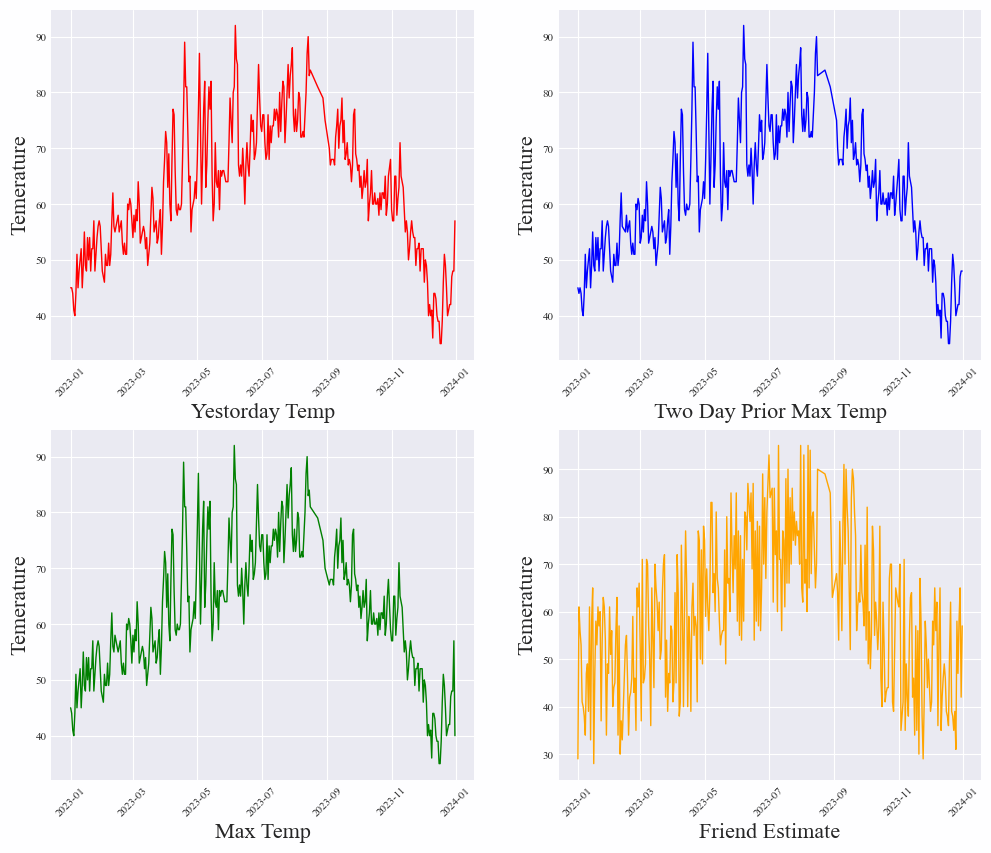

In [92]:
import matplotx
plt.style.use(matplotx.styles.pitaya_smoothie['light'])
plt.rcParams['font.size'] = 16
plt.figure(figsize=(12,10),dpi=100)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.subplot(221)
plt.plot(date,features['temp_1'], linewidth=1, color='red')
plt.ylabel('Temerature')
plt.xlabel('Yestorday Temp', fontproperties='Times New Roman')
plt.xticks(rotation=45)

plt.subplot(222)
plt.plot(date,features['temp_2'], linewidth=1, color='blue')
plt.ylabel('Temerature')
plt.xlabel('Two Day Prior Max Temp', fontproperties='Times New Roman')
plt.xticks(rotation=45)
plt.subplot(223)
plt.plot(date,features['actual'], linewidth=1, color='green')
plt.ylabel('Temerature')
plt.xlabel('Max Temp', fontproperties='Times New Roman')
plt.xticks(rotation=45)
plt.subplot(224)
plt.plot(date,features['friend'], linewidth=1, color='orange')
plt.ylabel('Temerature')
plt.xlabel('Friend Estimate', fontproperties='Times New Roman')
plt.xticks(rotation=45)
plt.show()

In [93]:
from pyecharts.charts import Line
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.globals import JsCode

In [94]:
dates = date.dt.date.astype('str').tolist()

In [95]:
line = (Line(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    .add_xaxis(dates)
    .add_yaxis('Yestorday Temp',features['temp_1'].tolist(),
              is_symbol_show=False,is_smooth=True,
              )
    .add_yaxis('Two Day Prior Max Temp',features['temp_2'].tolist(),
              is_symbol_show=False,is_smooth=True,
              )
    .add_yaxis('Max Temp',features['actual'].tolist(),
              is_symbol_show=False,is_smooth=True,
              )
    .add_yaxis('Friend Estimate',features['friend'].tolist(),
              is_symbol_show=False,is_smooth=True,
              )
    .set_global_opts(datazoom_opts=opts.DataZoomOpts(type_='inside'),
        tooltip_opts=opts.TooltipOpts(axis_pointer_type='cross',trigger='axis')
                    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
       )

line.render_notebook()

### 数据的预处理

In [96]:
features = pd.get_dummies(features)

In [97]:
target = np.array(features['actual'])
features.drop('actual', axis=1, inplace=True)
features_list = features.columns.tolist()


In [98]:
features = features[features_list].to_numpy()

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=1210)

In [102]:
print(f'训练集特征大小为: {X_train.shape}')
print(f"训练集的target大小为:  {y_train.shape}")
print(f'测试集特征大小为: {X_test.shape}')
print(f"测试集的target大小为:  {y_test.shape}")

训练集特征大小为: (261, 14)
训练集的target大小为:  (261,)
测试集特征大小为: (87, 14)
测试集的target大小为:  (87,)


### 建立一个基础的随机森林模型

In [103]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators=1000, random_state=1210)

rfg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=1210)

In [105]:
predict = rfg.predict(X_test)

errors = abs(predict - y_test)

mape = np.mean(100 * (errors / y_test))

print(f"测试集上的平均绝对误差大小为: {np.mean(mape)}")

测试集上的平均绝对误差大小为: 6.2762294534707435


In [111]:
from sklearn.metrics import get_scorer_names

# for index, i in enumerate(get_scorer_names()):
#     print(f'{index+1}. {i}')

### 分类任务评估指标:
1. accuracy: 准确率,正确分类样本站总样本的比例
2. f1: F1分数,精准率和召回率的调和平均值
3. recall: 召回率, 实际为正类别样本中被预测为正类别的比例
4. precision: 精准率,预测为正类别实际为正类别的比例
5. roc_auc: 接收者操作特征曲线下面的面积,用于评估分类器的性能


### 回归类任务评分指标
1. neg_mean_squared_error: 负的均方误差,预测值和实际值之差的平方的平均值
2. neg_mean_squared_log_error: 负均方对数误差
3. neg_mean_absolute_error: 负平均绝对误差,预测值和实际值之差的绝对值的平均值
4. r2: 决定系数,衡量模型的好坏


In [112]:
from sklearn.tree import export_graphviz
import pydot # pip install pydot

In [115]:
tree = rfg.estimators_[5]
export_graphviz(tree, out_file='tree.dot',
               feature_names=features_list,
                rounded=True
               )
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [120]:
print(tree.tree_.max_depth)

12


In [139]:
rfg_small = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
rfg_small.fit(X_train, y_train)

tree = rfg_small.estimators_[0] # 获取随机森林中的指定的某个树


In [140]:
import dtreeviz  # pip install dtreeviz

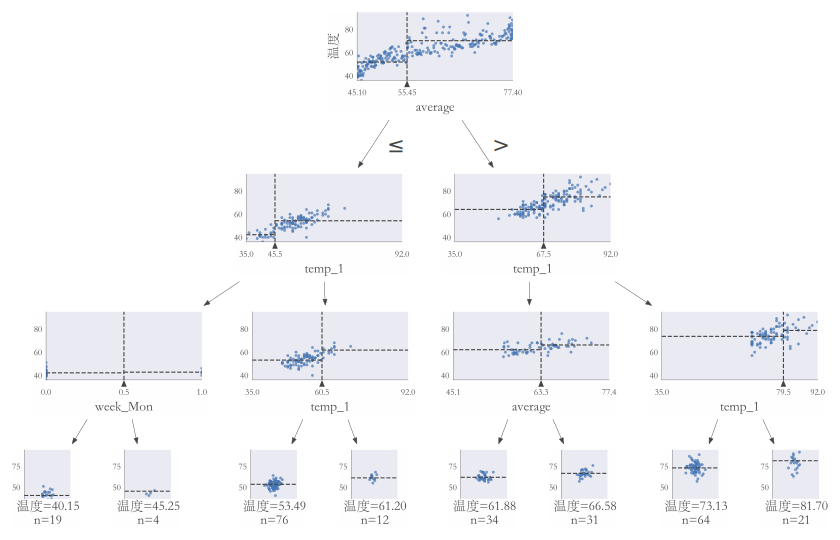

In [141]:
viz_model = dtreeviz.model(tree,                        # 导入树模型
                          X_train=X_train,             # 用于训练模型的特征
                          y_train=y_train,             # 用于训练模型的标签
                          feature_names=features_list,  # 特征名称列表
                          target_name='温度', # 最终分类的名称
                          )
viz_model.view(fontname='STsong',scale=1.5)

In [142]:
importtances = rfg_small.feature_importances_  # 重要特征
feature_importances = [
    (features, round(importtance, 2))
    for features, importtance in zip(features_list, importtances)
]
feature_importances = sorted(feature_importances, key=lambda x:x[1], reverse=True)
feature_importances

[('temp_1', 0.61),
 ('average', 0.38),
 ('temp_2', 0.01),
 ('year', 0.0),
 ('month', 0.0),
 ('day', 0.0),
 ('friend', 0.0),
 ('week_Fri', 0.0),
 ('week_Mon', 0.0),
 ('week_Sat', 0.0),
 ('week_Sun', 0.0),
 ('week_Thurs', 0.0),
 ('week_Tues', 0.0),
 ('week_Wed', 0.0)]

In [143]:
predict = rfg_small.predict(X_test)

errors = abs(predict - y_test)

mape = np.mean(100 * (errors / y_test))

print(f"测试集上的平均绝对误差大小为: {np.mean(mape)}")

测试集上的平均绝对误差大小为: 6.573792918154092


### 使用两个重要特征进行模型测试

In [147]:
rfg_most_important = RandomForestRegressor(n_estimators=100,random_state=42)

import_indices = [features_list.index('temp_1'),features_list.index('average')]
train_import = X_train[:, import_indices]
test_import = X_test[:,import_indices]
rfg_most_important.fit(train_import, y_train)

RandomForestRegressor(random_state=42)

In [149]:
predict = rfg_most_important.predict(test_import)

errors = abs(predict - y_test)

mape = np.mean(100 * (errors / y_test))

print(f"测试集上的平均绝对误差大小为: {np.mean(mape)}")

测试集上的平均绝对误差大小为: 6.830580992489698


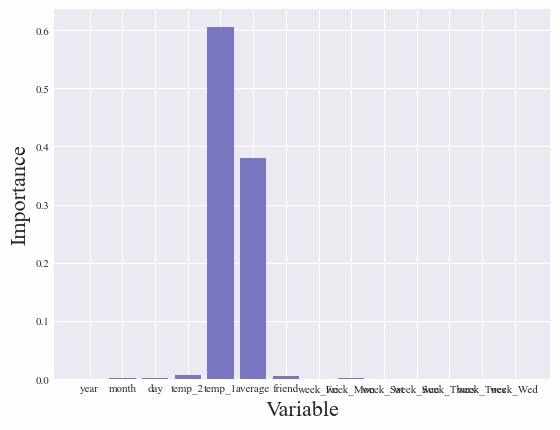

In [151]:
x_values = list(range(len(importtances)))

plt.bar(x_values, importtances)
plt.xticks(x_values, features_list,)
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.show()

## 更多的数据会不会有更好的效果

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
print('Python version:', sys.version)
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Matplotlib version:', matplotlib.__version__)

Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
Pandas version: 2.2.2
Numpy version: 1.26.4
Matplotlib version: 3.8.4


In [97]:

data = pd.read_csv('./data/temps_extended.csv')
data.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


- ws_1: 前一天的风速
- prcp_1: 前一天的降水量
- snwd_1: 前一天的积雪深度

In [98]:
data.shape

(2191, 12)

0. 先完成数据字段的分析以及可视化工作?
1. 增加新的数据,模型效果会提升多少?
2. 增加新的字段,模型效果会提升多少?

In [99]:
round(data.describe(),2)

,year,month,day,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
count,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00
mean,2013.50,6.52,15.71,7.37,0.12,0.01,61.17,61.18,60.29,61.18,60.31
std,1.71,3.45,8.80,3.15,0.25,0.15,13.09,13.08,10.73,13.08,15.87
min,2011.00,1.00,1.00,0.89,0.00,0.00,29.00,29.00,45.10,29.00,25.00
25%,2012.00,4.00,8.00,5.14,0.00,0.00,51.00,51.00,50.10,51.00,49.00
50%,2014.00,7.00,16.00,6.71,0.00,0.00,60.00,60.00,58.80,60.00,60.00
75%,2015.00,10.00,23.00,9.17,0.12,0.00,71.00,71.00,70.20,71.00,71.00
max,2017.00,12.00,31.00,21.25,2.20,3.00,96.00,96.00,77.40,96.00,97.00


In [100]:
dates = pd.to_datetime(data[['year','month','day']])

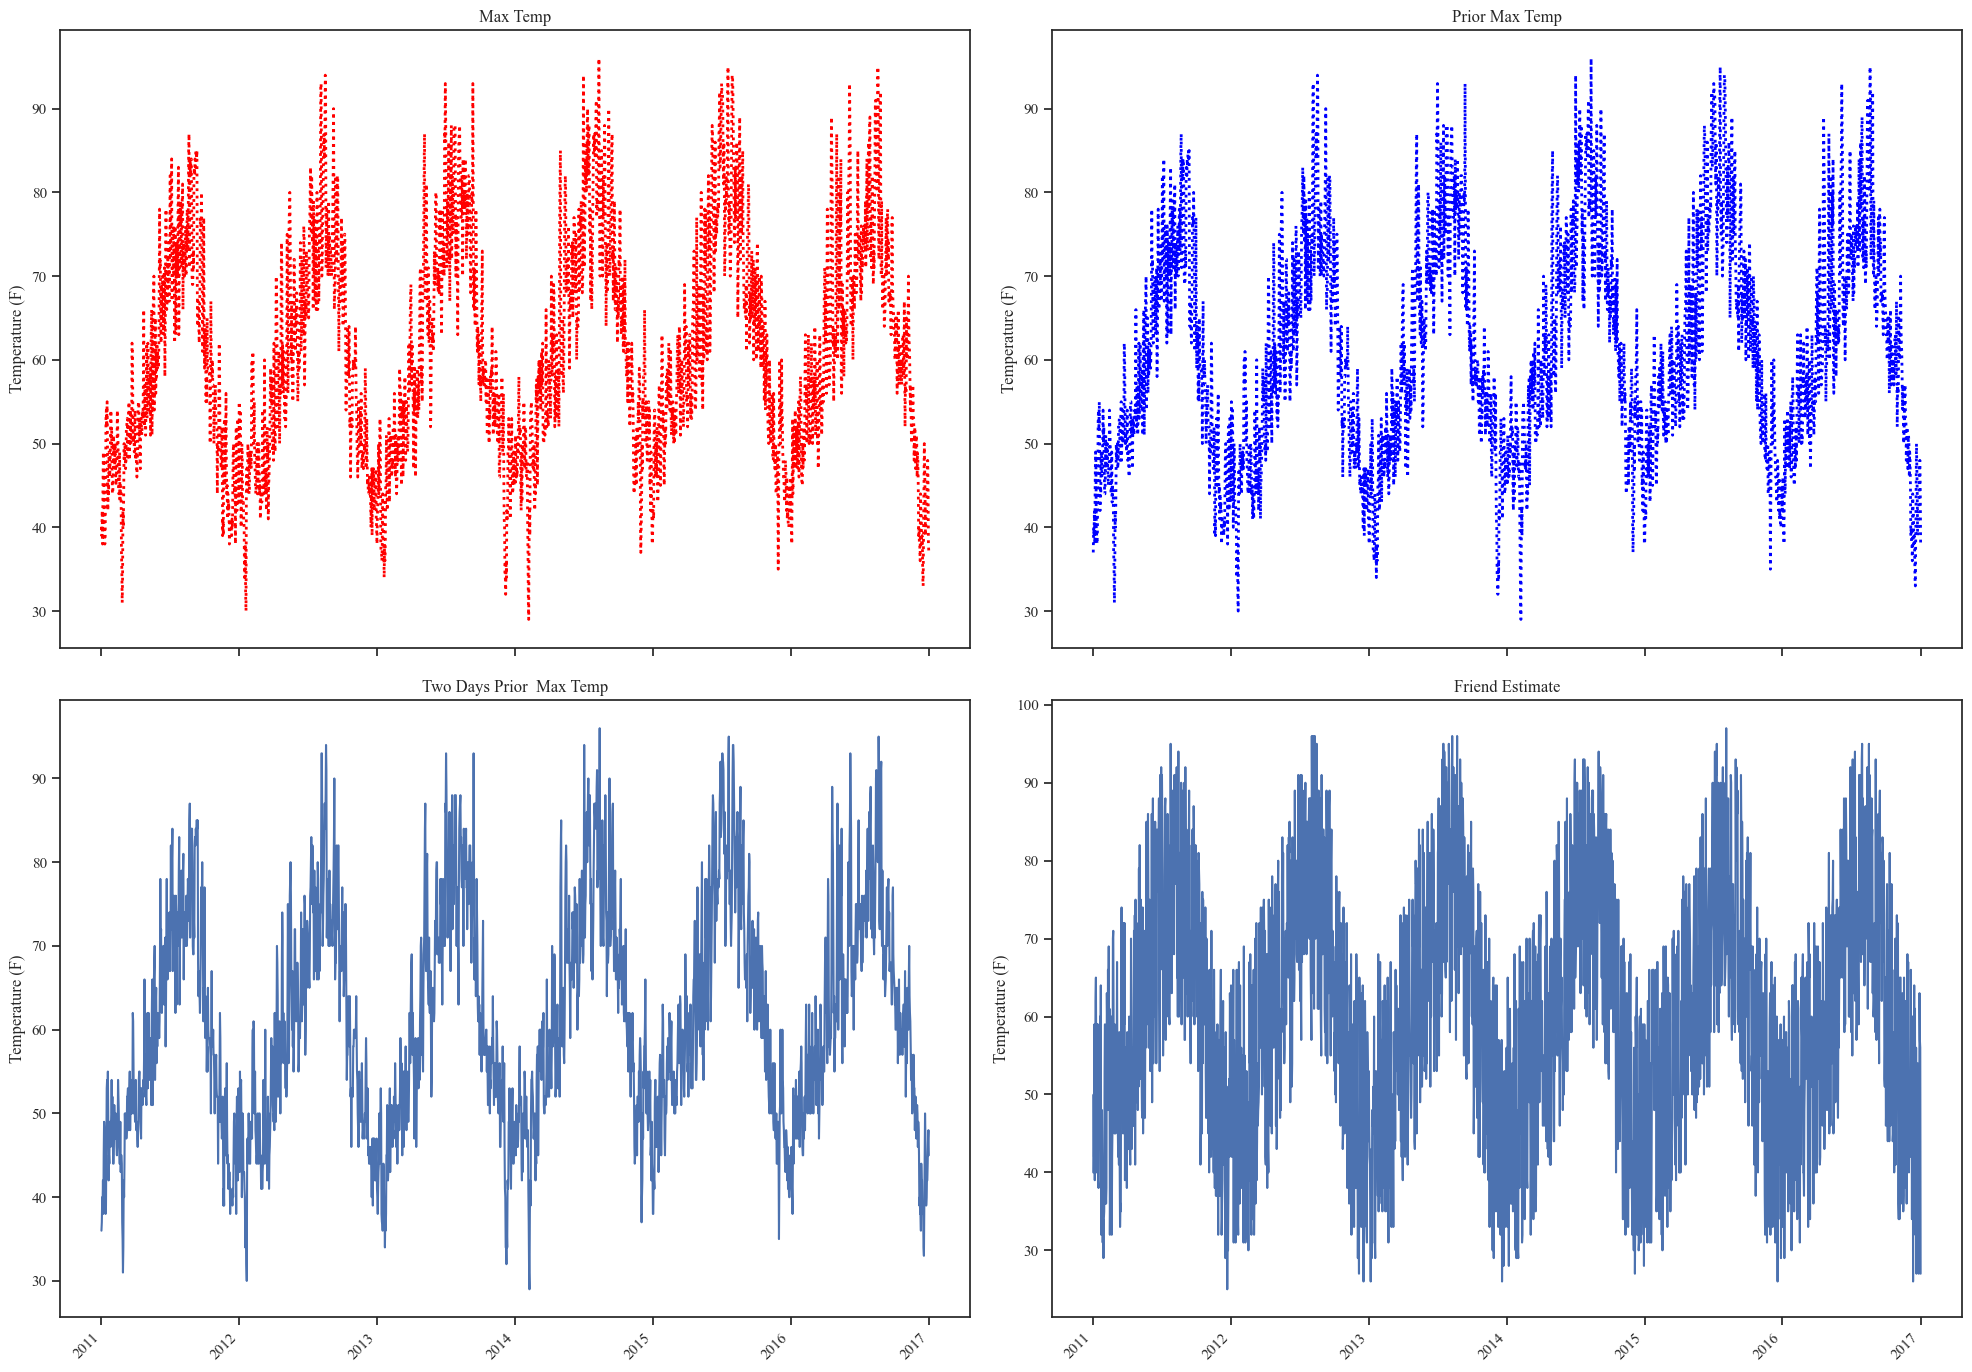

In [101]:
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,14))
fig.autofmt_xdate(rotation=45)

ax1.plot(dates, data['actual'], linewidth =2, c='red', linestyle='dotted')
ax1.set_xlabel("")
ax1.set_ylabel("Temperature (F)")
ax1.set_title('Max Temp')

ax2.plot(dates,data['temp_1'],linewidth =2, c='blue', linestyle='dotted')
ax2.set_ylabel("Temperature (F)")
ax2.set_title('Prior Max Temp')

ax3.plot(dates, data['temp_2'])
ax3.set_ylabel("Temperature (F)")
ax3.set_title('Two Days Prior  Max Temp')

ax4.plot(dates, data['friend'])
ax4.set_ylabel("Temperature (F)")
ax4.set_title('Friend Estimate')


plt.tight_layout()
plt.show()

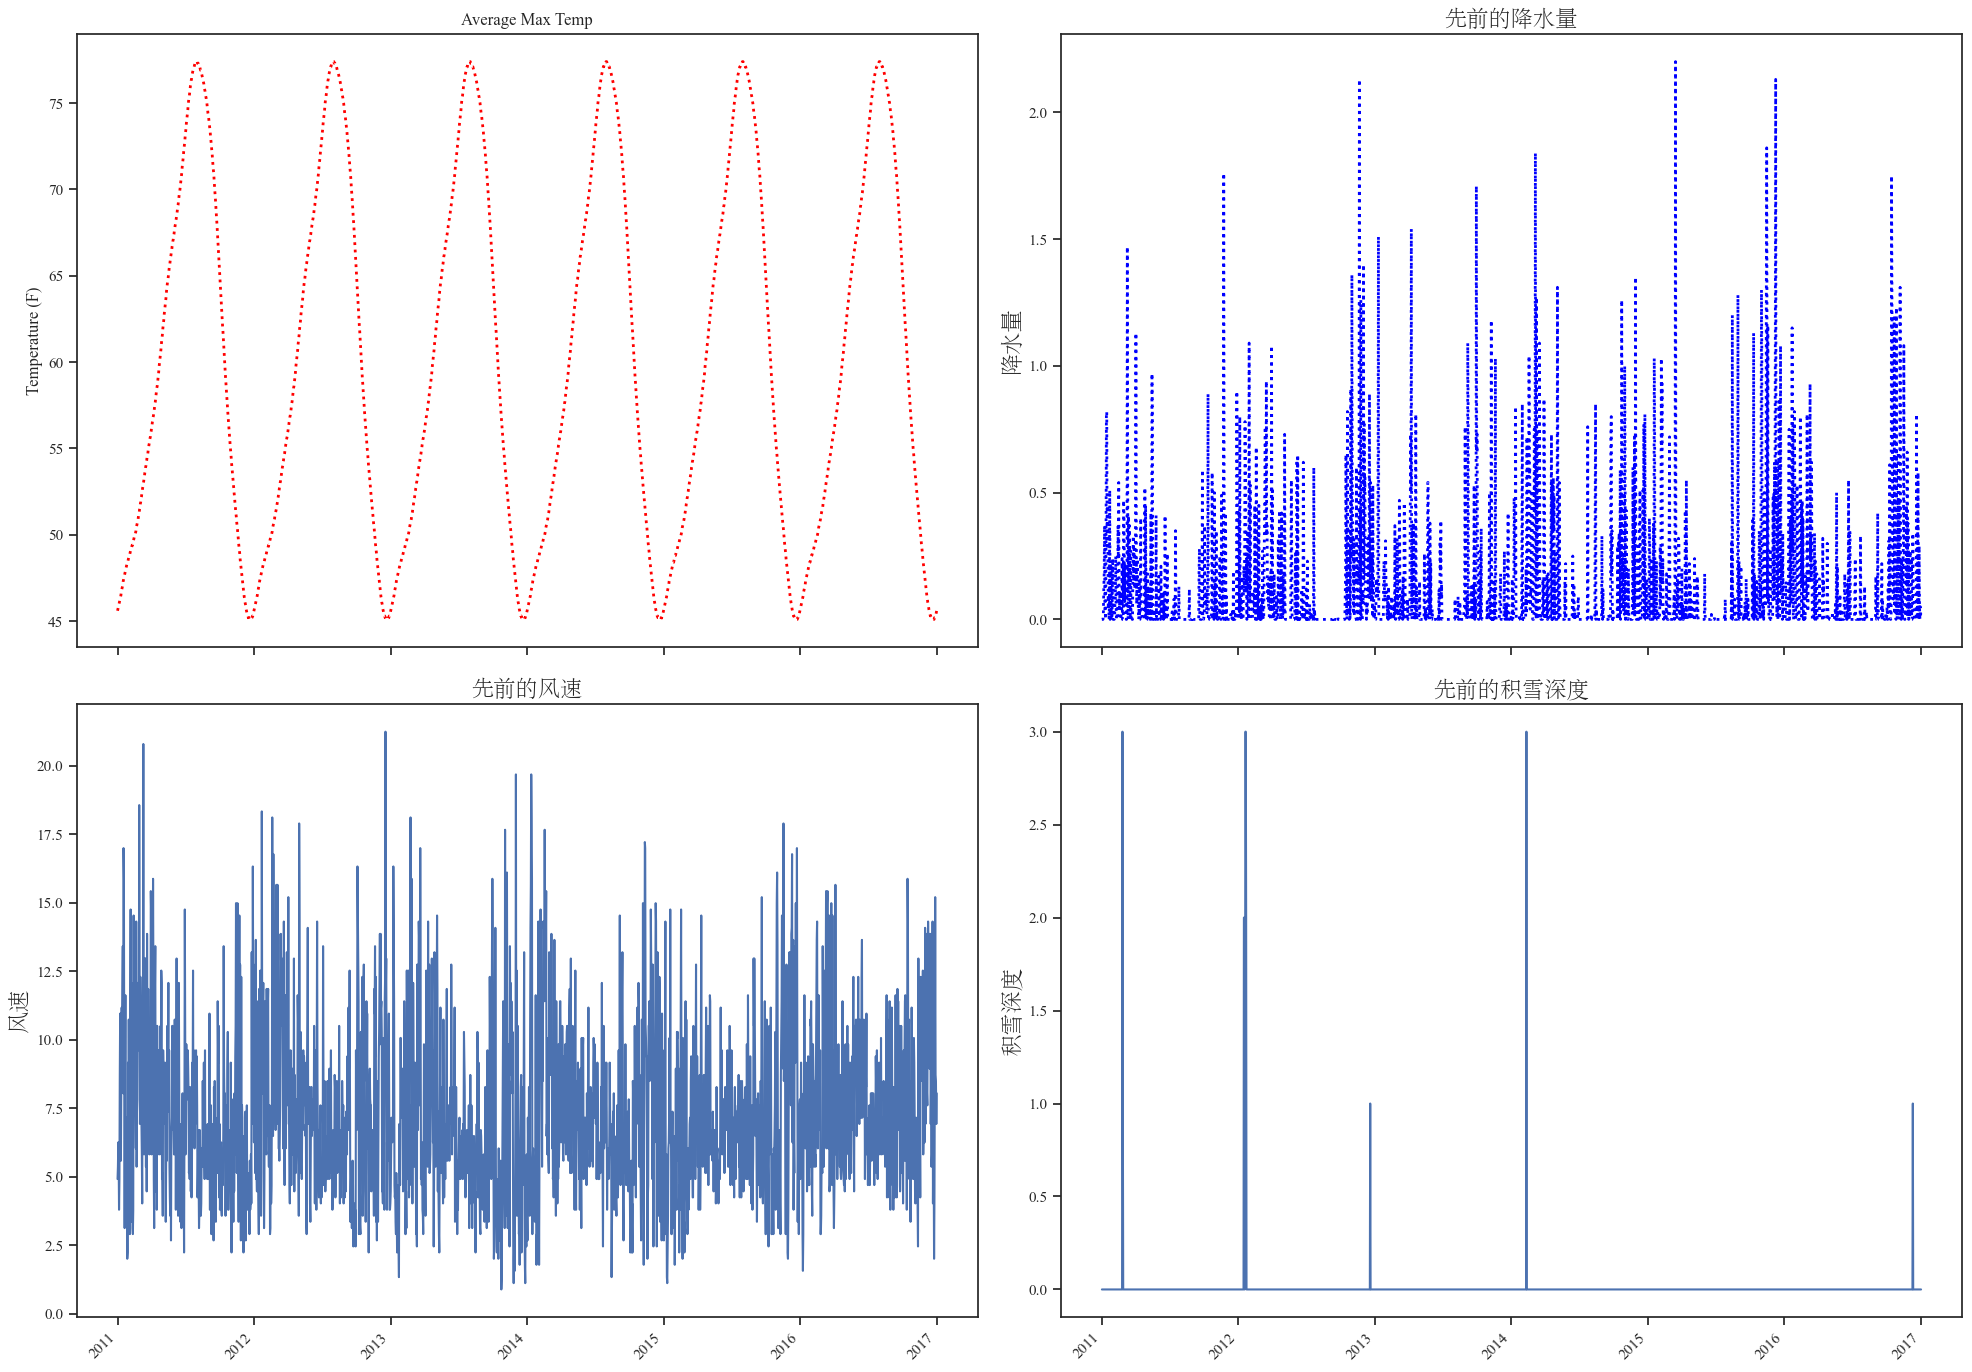

In [102]:
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,14))
fig.autofmt_xdate(rotation=45)

ax1.plot(dates, data['average'], linewidth =2, c='red', linestyle='dotted')
ax1.set_xlabel("")
ax1.set_ylabel("Temperature (F)")
ax1.set_title('Average Max Temp')

ax2.plot(dates,data['prcp_1'],linewidth =2, c='blue', linestyle='dotted')
ax2.set_ylabel('降水量',fontproperties='STsong')
ax2.set_title('先前的降水量',fontproperties='STsong')

ax3.plot(dates, data['ws_1'])
ax3.set_ylabel("风速",fontproperties='STsong')
ax3.set_title('先前的风速',fontproperties='STsong')
ax4.plot(dates, data['snwd_1'])
ax4.set_ylabel("积雪深度",fontproperties='STsong')
ax4.set_title('先前的积雪深度',fontproperties='STsong')
plt.tight_layout()
plt.show()

季节角度考虑一下. 使用pairplot完成季节角度的可视化.

1,2,12  winter

3,4,5  spring

6,7,8 summer

9,10,11 fall

In [103]:
def ana_seasons(x):
    if x in [1,2,12]:
        return 'winter'
    elif x in [3,4,5]:
        return 'spring'
    elif x in [6,7,8]:
        return 'summer'
    else:
        return 'fall'
sub_data = data[['temp_1','prcp_1', 'average', 'actual']].copy()
sub_data['seasons'] = data['month'].apply(ana_seasons)

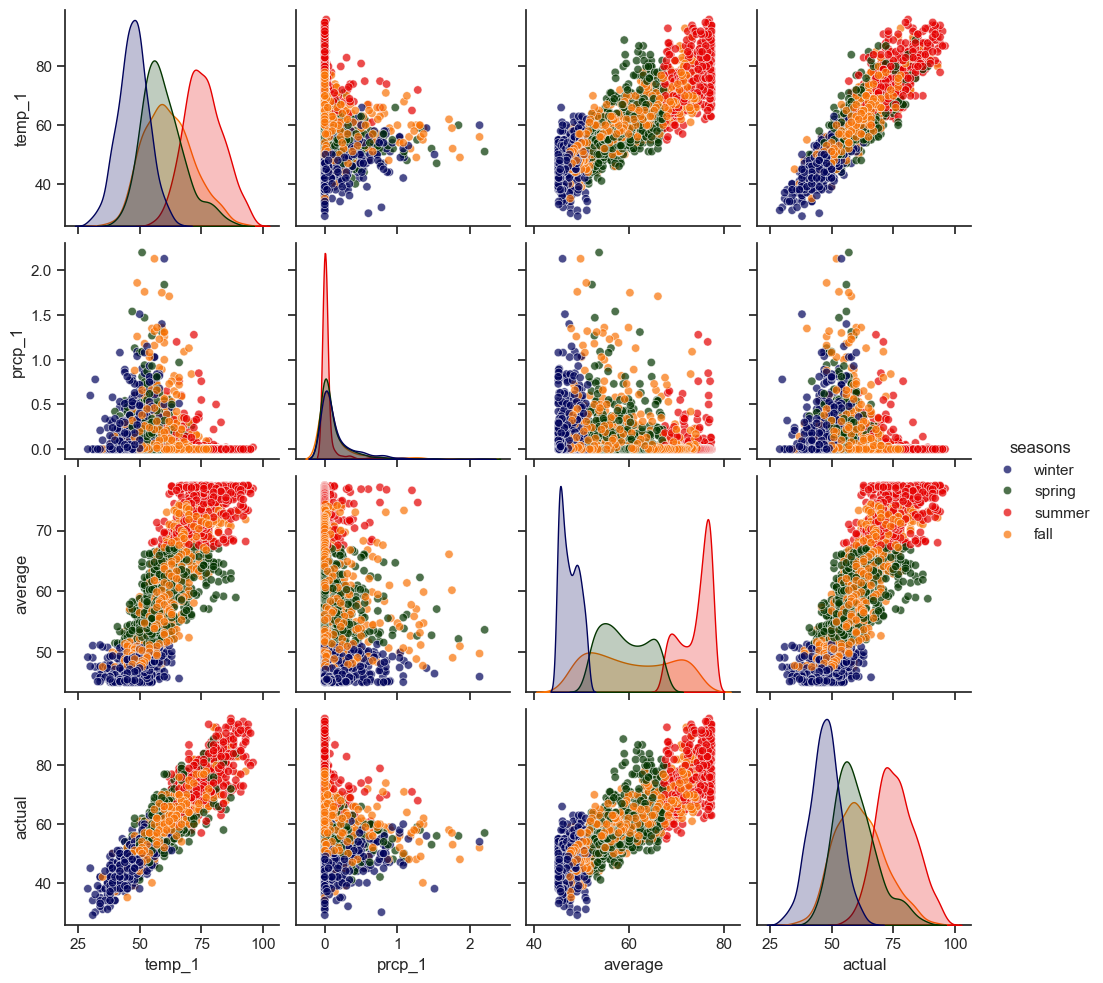

In [104]:
import seaborn as sns

sns.set(style='ticks', color_codes=True)
palette = sns.xkcd_palette(['dark blue','dark green','red', 'orange'])

sns.pairplot(sub_data, hue='seasons', diag_kind='kde',palette=palette,
            plot_kws=dict(alpha=0.7)
            )
plt.show()

In [120]:
data = pd.get_dummies(data) # 使用独热编码对数据集进行处理

In [121]:
data.drop('friend',axis=1, inplace=True)

In [139]:
y = data['actual'].to_numpy() # 提取target
X = data.drop('actual',axis=1).to_numpy()
features =  data.drop('actual',axis=1).columns

### 增加数量和特征的数据集

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=1210
) # 既增大了数量梁,也增大了特征量
print(f"训练集样本大小为: {X_train.shape}")
print(f"测试集样本大小为: {X_test.shape}")
print(f"训练集标签样本大小为: {y_train.shape}")
print(f"测试集标签样本大小为: {y_test.shape}")

训练集样本大小为: (1752, 16)
测试集样本大小为: (439, 16)
训练集标签样本大小为: (1752,)
测试集标签样本大小为: (439,)


### 只增加数量的数据集

In [124]:
y_ = data['actual'].to_numpy() # 提取target
X_ = data.drop(['actual','ws_1','prcp_1','snwd_1'],axis=1).to_numpy()

In [125]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(
    X_,y_, test_size=0.2, random_state=1210
) # 既增大了数量梁,也增大了特征量
print(f"训练集样本大小为: {X_train_.shape}")
print(f"测试集样本大小为: {X_test_.shape}")
print(f"训练集标签样本大小为: {y_train_.shape}")
print(f"测试集标签样本大小为: {y_test_.shape}")

训练集样本大小为: (1752, 13)
测试集样本大小为: (439, 13)
训练集标签样本大小为: (1752,)
测试集标签样本大小为: (439,)


### 原始数据集

In [140]:
data2 = pd.read_csv('./data/temps.csv')
data2 = pd.get_dummies(data2)
data2.drop('friend',axis=1,inplace=True)
y_init = data2['actual'].to_numpy()
X_init = data2.drop('actual',axis=1).to_numpy()
features_init = data2.drop('actual',axis=1).columns

In [127]:
X_train_init, X_test_init, y_train_init, y_test_init = train_test_split(
    X_init,y_init, test_size=0.2, random_state=1210
) # 既增大了数量梁,也增大了特征量
print(f"初始训练集样本大小为: {X_train_init.shape}")
print(f"初始测试集样本大小为: {X_test_init.shape}")
print(f"初始训练集标签样本大小为: {y_train_init.shape}")
print(f"初始测试集标签样本大小为: {y_test_init.shape}")

初始训练集样本大小为: (278, 13)
初始测试集样本大小为: (70, 13)
初始训练集标签样本大小为: (278,)
初始测试集标签样本大小为: (70,)


## 模型测试

In [128]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor(n_estimators=100, random_state=1210)

# 使用老的数据集进行测试
rfg.fit(X_train_init, y_train_init)

predict = rfg.predict(X_test_init)
# 计算平均误差
erros = abs(predict - y_test_init)

print(f"初始模型平均温度误差为: {round(np.mean(erros),2)} degrees")
mape = 100 * (erros / y_test_init)
accuracy = 100 -np.mean(mape)
print(f'初始模型准确率: {round(accuracy, 2)}%')

初始模型平均温度误差为: 4.16 degrees
初始模型准确率: 93.44%


In [129]:
rfg_ = RandomForestRegressor(n_estimators=100, random_state=1210)
# 使用老的数据集进行测试
rfg_.fit(X_train_, y_train_)

predict_ = rfg_.predict(X_test_)
# 计算平均误差
erros_ = abs(predict_ - y_test_)

print(f"增大数据量之后的模型平均温度误差为: {round(np.mean(erros_),2)} degrees")
mape_ = 100 * (erros_ / y_test_)
accuracy_ = 100 -np.mean(mape_)
print(f'增大数据量之后的模型准确率: {round(accuracy_, 2)}%')

增大数据量之后的模型平均温度误差为: 3.79 degrees
增大数据量之后的模型准确率: 93.51%


In [132]:
rfg_now = RandomForestRegressor(n_estimators=100, random_state=1210)
# 使用老的数据集进行测试
rfg_now.fit(X_train, y_train)

predict_now = rfg_now.predict(X_test)
# 计算平均误差
erros_now = abs(predict_now - y_test)

print(f"增大数据量之后的模型平均温度误差为: {round(np.mean(erros_now),2)} degrees")
mape_now = 100 * (erros_now / y_test)
accuracy_now = 100 -np.mean(mape_now)
print(f'增大数据量之后的模型准确率: {round(accuracy_now, 2)}%')

增大数据量之后的模型平均温度误差为: 3.79 degrees
增大数据量之后的模型准确率: 93.5%


### 特征的重要性

In [154]:
importances = rfg_now.feature_importances_
feature_importances = list(zip(features,importances))
feature_importances = sorted(feature_importances, key=lambda x:x[1], reverse=True)
for i in feature_importances:
    print(f"Veriable: {i[0]:40} \t Importance: {round(i[1],2)}")

Veriable: temp_1                                   	 Importance: 0.85
Veriable: average                                  	 Importance: 0.05
Veriable: ws_1                                     	 Importance: 0.02
Veriable: day                                      	 Importance: 0.02
Veriable: temp_2                                   	 Importance: 0.02
Veriable: year                                     	 Importance: 0.01
Veriable: prcp_1                                   	 Importance: 0.01
Veriable: month                                    	 Importance: 0.01
Veriable: weekday_Wed                              	 Importance: 0.0
Veriable: weekday_Fri                              	 Importance: 0.0
Veriable: weekday_Tues                             	 Importance: 0.0
Veriable: weekday_Mon                              	 Importance: 0.0
Veriable: weekday_Sat                              	 Importance: 0.0
Veriable: weekday_Thurs                            	 Importance: 0.0
Veriable: weekday_Sun     

Text(0.5, 1.0, 'Variable with Importance')

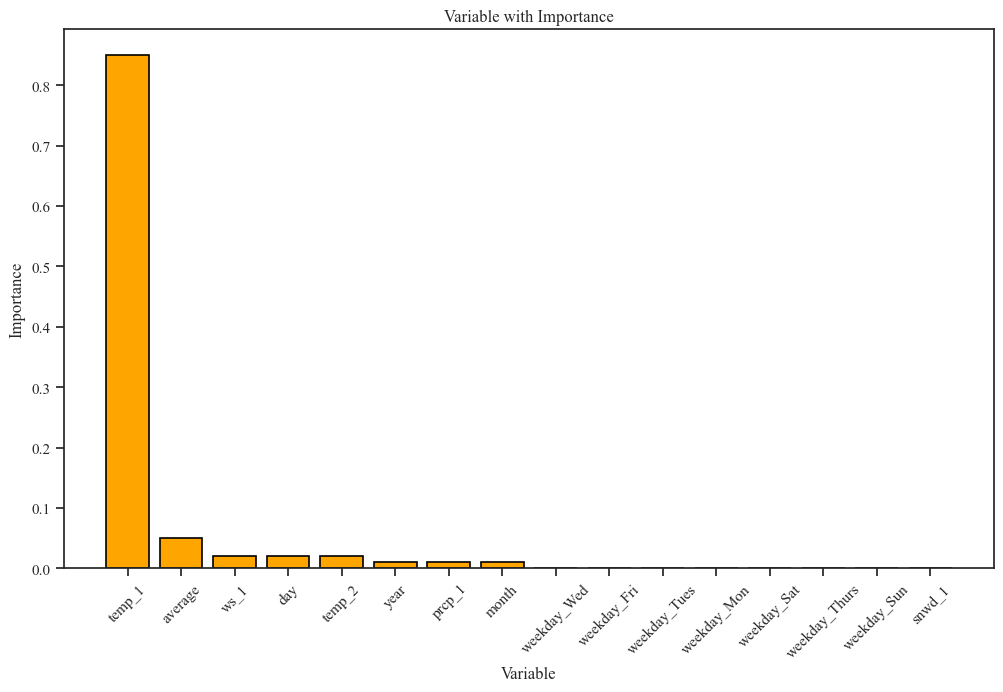

In [161]:
x_value = [i[0] for i in feature_importances]
y_value = [round(i[1],2) for i in feature_importances]

plt.figure(figsize=(12,7),dpi=100)
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.bar(x_value,y_value, color='orange',edgecolor='black',linewidth=1.2)

plt.xlabel('Variable')
plt.xticks(rotation=45)
plt.ylabel('Importance')
plt.title("Variable with Importance")

### 特征重要性累加

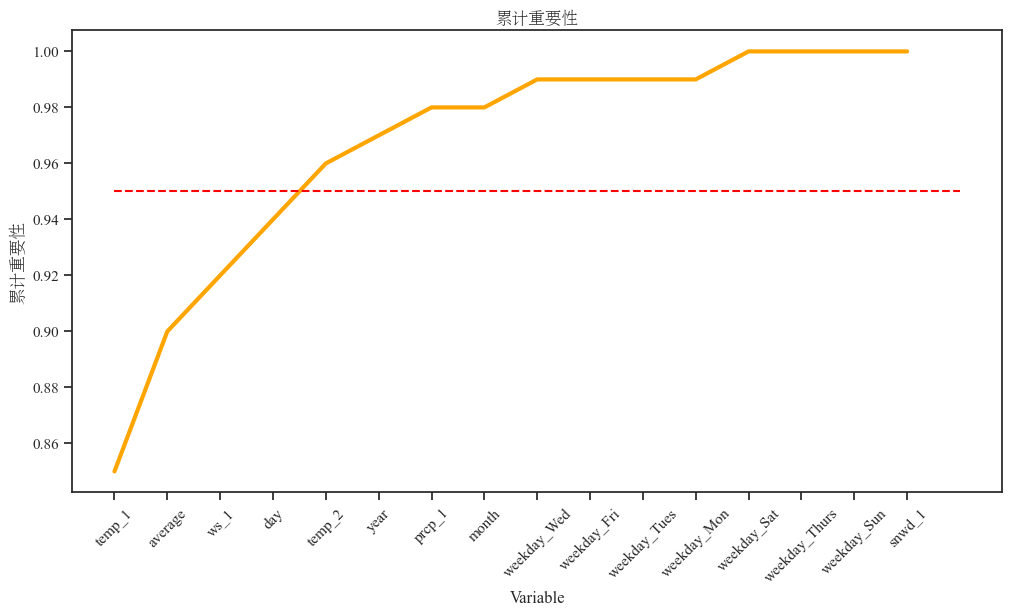

In [181]:
tb = pd.DataFrame(feature_importances,columns=['varible','importance'])
tb['cum_importance'] = tb['importance'].cumsum().round(2)

x_value = [i[0] for i in feature_importances]
y_value = [round(i[1],2) for i in feature_importances]

plt.figure(figsize=(12,6),dpi=100)
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.plot(tb['varible'],tb['cum_importance'] , color='orange',linewidth=3)
plt.hlines(y=0.95, xmin=0, xmax=len(x_value),colors='red',linestyles='dashed')
plt.xlabel('Variable')
plt.xticks(rotation=45)
plt.ylabel("累计重要性",fontproperties='STsong')
plt.title("累计重要性",fontproperties='STsong')
plt.show()

### 新的问题,如果只使用这5个特征,模型效果怎么样?时间效率如何?

In [188]:
importances_feature_name = tb[tb['cum_importance'] < 0.95]['varible'].tolist()

In [217]:
def get_data(data,name=importances_feature_name):
    y = data['actual'].to_numpy()
    X = data[name]
    X_train, X_test, y_train, y_test = train_test_split(
        X,y, test_size=0.2, random_state=1210
    ) # 既增大了数量梁,也增大了特征量
#     print(f"训练集样本大小为: {X_train.shape}")
#     print(f"测试集样本大小为: {X_test.shape}")
#     print(f"训练集标签样本大小为: {y_train.shape}")
#     print(f"测试集标签样本大小为: {y_test.shape}")
    return X_train,X_test,y_train,y_test

In [218]:
def model_train(X_train,X_test,y_train,y_test):
    rfg = RandomForestRegressor(n_estimators=100, random_state=1210)
    # 使用老的数据集进行测试
    rfg.fit(X_train, y_train)

    predict = rfg.predict(X_test)
    # 计算平均误差
    erros = abs(predict - y_test)

#     print(f"初始模型平均温度误差为: {round(np.mean(erros),2)} degrees")
    mape = 100 * (erros / y_test)
    accuracy = 100 -np.mean(mape)
#     print(f'初始模型准确率: {round(accuracy, 2)}%')
    return accuracy, erros

In [213]:
# 只取了新特征的模型

new_accuracy,new_erros = model_train(X_train,X_test,y_train,y_test)

训练集样本大小为: (1752, 4)
测试集样本大小为: (439, 4)
训练集标签样本大小为: (1752,)
测试集标签样本大小为: (439,)
初始模型平均温度误差为: 3.86 degrees
初始模型准确率: 93.39%


In [214]:
# 原来所有特征的?
X_train,X_test,y_train,y_test = get_data(data,name=data.drop('actual',axis=1).columns.tolist())
accuracy,erros = model_train(X_train,X_test,y_train,y_test)

训练集样本大小为: (1752, 16)
测试集样本大小为: (439, 16)
训练集标签样本大小为: (1752,)
测试集标签样本大小为: (439,)
初始模型平均温度误差为: 3.79 degrees
初始模型准确率: 93.5%


In [226]:
import time
X_train,X_test,y_train,y_test = get_data(data)
all_time = []
new_accuracys = []
new_erross = []
for _ in range(100):
    start_time = time.time()
    new_accuracy,new_erros = model_train(X_train,X_test,y_train,y_test)
    end_time = time.time()
    all_time.append(end_time - start_time)
    new_erross.append(round(np.mean(new_erros),2))
    new_accuracys.append(round(new_accuracy,2))
all_feature_time = np.mean(all_time)
print(f'使用95%重要性特征建模的平均时间消耗为: {round(all_feature_time,2)}秒')

使用95%重要性特征建模的平均时间消耗为: 0.48秒


In [227]:
import time
X_train,X_test,y_train,y_test = get_data(data,name=data.drop('actual',axis=1).columns.tolist())
all_time2 = []
accuracys = []
errorss = []
for _ in range(100):
    start_time = time.time()
    accuracy,erros = model_train(X_train,X_test,y_train,y_test)
    end_time = time.time()
    all_time2.append(end_time - start_time)
    errorss.append(round(np.mean(erros),2))
    accuracys.append(round(accuracy,2))
all_feature_time2 = np.mean(all_time2)
print(f'使用全部特征建模的平均时间消耗为: {round(all_feature_time2,2)}秒')

使用全部特征建模的平均时间消耗为: 0.79秒


In [229]:
df = pd.DataFrame({
    'features': ['all(16)', 'reduced(5)'],
    'run_time': [round(all_feature_time2,2),round(all_feature_time,2)],
    'accuracy': [np.mean(accuracys), np.mean(new_accuracy)],
    'errors': [round(np.mean(errorss),2), round(np.mean(new_erross),2)]
})
df

,features,run_time,accuracy,errors
0,all(16),0.79,93.500000,3.79
1,reduced(5),0.48,93.390807,3.86


In [239]:
print(f"相对准确率降低了: {round(abs(df['accuracy'].pct_change()[1]),3)*100}%")
print(f"相对时间效率提升了: {round(abs(df['run_time'].pct_change()[1]),3)*100}%")
print(f"相对误差增加了: {round(abs(df['errors'].pct_change()[1]*100),3)}%")

相对准确率降低了: 0.1%
相对时间效率提升了: 39.2%
相对误差增加了: 1.847%


计算: 增加数据量,三种指标的提升

计算: 增加新特征,三种指标的提升[原始数据的特征,新数据增加了4个指标]

最后完成可视化. [初始数据, 增加数据(不含新特征),增加数据(含新特征), 增加数据(核心特征)]